In [ ]:
# Load Packages
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
# Load the Iris dataset from sklearn
iris = load_iris()
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width  species  cluster_pca  \
0           5.1          3.5           1.4          0.2        0            2   
1           4.9          3.0           1.4          0.2        0            1   
2           4.7          3.2           1.3          0.2        0            1   
3           4.6          3.1           1.5          0.2        0            1   
4           5.0          3.6           1.4          0.2        0            2   

   dbscan_cluster  
0               0  
1               1  
2               1  
3               1  
4               0  


In [ ]:
# Drop the 'species' column for unsupervised clustering
X = iris_df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_pca,dbscan_cluster
0,5.1,3.5,1.4,0.2,2,0
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,2,0


In [ ]:
# Check for missing values in the dataset
missing_values = X.isnull().sum()
print(f"Missing values per feature:\n{missing_values}")

Missing values per feature:
sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
cluster_pca       0
dbscan_cluster    0
dtype: int64


In [ ]:
# Scale the Feature Columns with StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled Feature Sample:")
print(X_scaled_df.head())


Scaled Feature Sample:
   sepal_length  sepal_width  petal_length  petal_width  cluster_pca  \
0     -0.900681     1.019004     -1.340227    -1.315444     1.717463   
1     -1.143017    -0.131979     -1.340227    -1.315444     0.507982   
2     -1.385353     0.328414     -1.397064    -1.315444     0.507982   
3     -1.506521     0.098217     -1.283389    -1.315444     0.507982   
4     -1.021849     1.249201     -1.340227    -1.315444     1.717463   

   dbscan_cluster  
0       -0.684529  
1        0.123970  
2        0.123970  
3        0.123970  
4       -0.684529  


In [ ]:
# EDA (Exploratory Data Analysis)
print("Dataset Info:")
iris_df.info()

print("\nSummary Statistics:")
print(X.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sepal_length    150 non-null    float64
 1   sepal_width     150 non-null    float64
 2   petal_length    150 non-null    float64
 3   petal_width     150 non-null    float64
 4   species         150 non-null    int64  
 5   cluster_pca     150 non-null    int32  
 6   dbscan_cluster  150 non-null    int64  
dtypes: float64(4), int32(1), int64(2)
memory usage: 7.7 KB

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width  cluster_pca  \
count    150.000000   150.000000    150.000000   150.000000   150.000000   
mean       5.843333     3.057333      3.758000     1.199333     0.580000   
std        0.828066     0.435866      1.765298     0.762238     0.829571   
min        4.300000     2.000000      1.000000     0.100000     0.000000   
25%        5.100

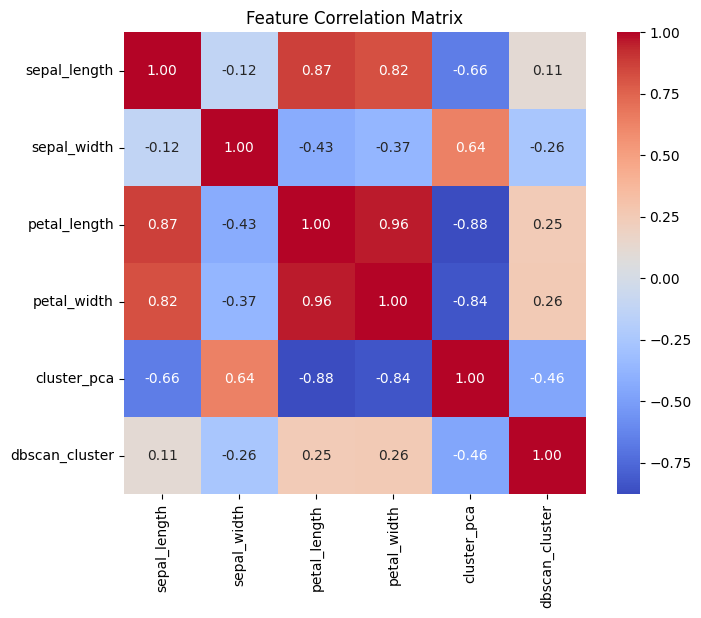

In [ ]:
# Correlation Heatmap of the features
corr = iris_df.drop('species', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

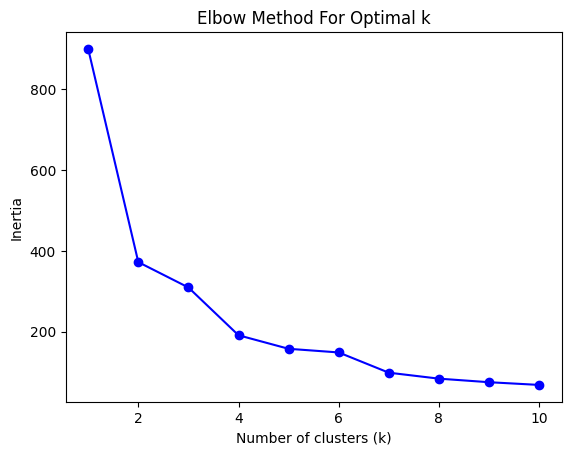

In [ ]:
# Elbow Method for K-Means
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled_df)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# PCA on the scaled Iris features
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_df)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.64448741 0.18976797]


In [ ]:
# loadings
loadings = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print("\nPCA loadings:\n", loadings)


PCA loadings:
      sepal_length  sepal_width  petal_length  petal_width  cluster_pca  \
PC1      0.417125    -0.278099      0.494555     0.479760    -0.482143   
PC2     -0.449751    -0.555605     -0.181309    -0.191324    -0.182554   

     dbscan_cluster  
PC1        0.203596  
PC2        0.621468  


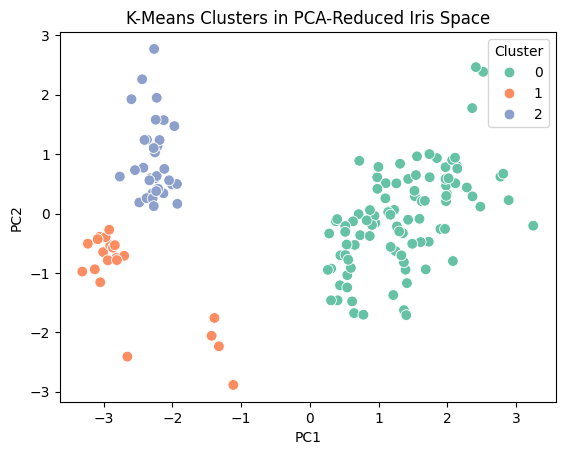

In [ ]:
# K-Means in PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

iris_df['cluster_pca'] = clusters_pca

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris_df['cluster_pca'], palette='Set2', s=60)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters in PCA-Reduced Iris Space')
plt.legend(title='Cluster')
plt.show()

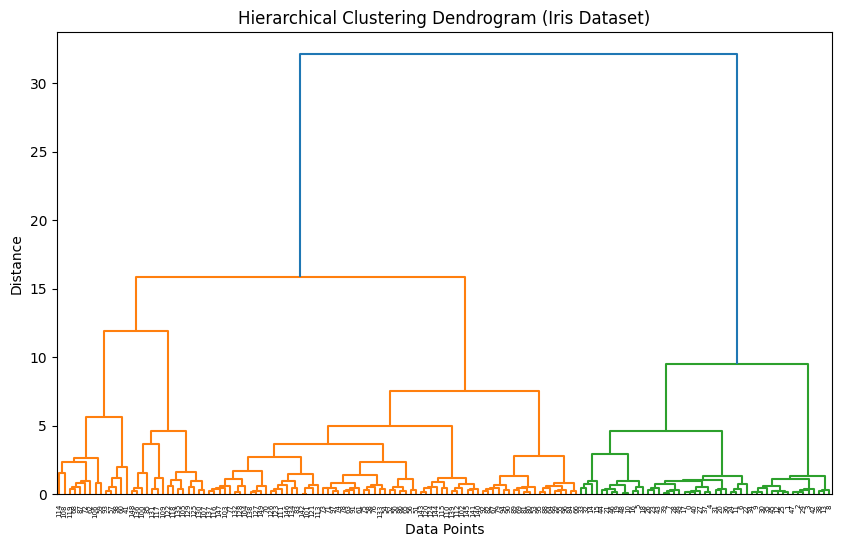

In [ ]:
#  Hierarchical Clustering
Z = linkage(X_scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Choosen number of clusters as 3
n_clusters = 3

# Assign cluster labels
hc_labels = fcluster(Z, t=4, criterion='maxclust')

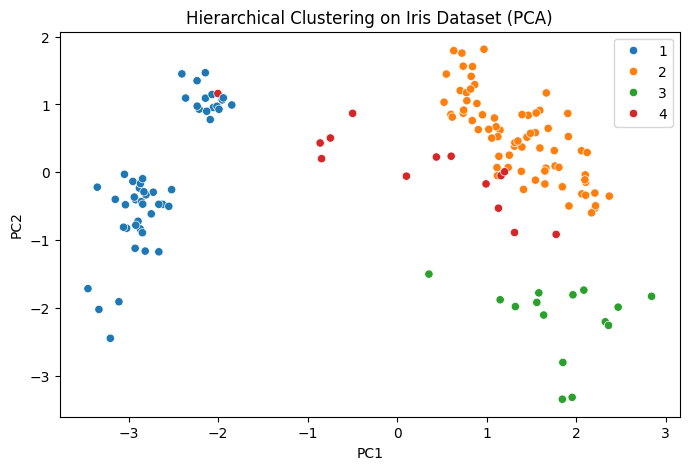

In [ ]:
# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue= hc_labels, palette='tab10')
plt.title('Hierarchical Clustering on Iris Dataset (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
# DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
db_labels = db.fit_predict(X_scaled_df)

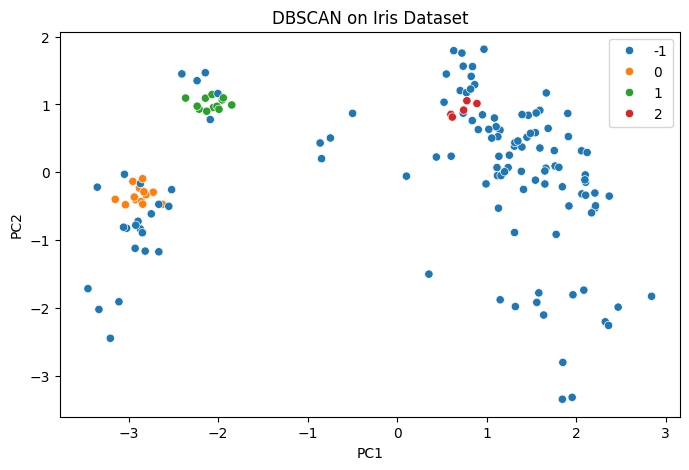

In [ ]:
# Visualize DBSCAN result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=db_labels, palette='tab10')
plt.title('DBSCAN on Iris Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()